# INTRODUCTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

# Research Questions
The aim of our study is to answer the below research questions:

**a)** Does price vary with Airlines?

**b)** How is the price affected when tickets are bought in just 1 or 2 days before departure?

**c)** How the price changes with change in Source and Destination?


**DATA COLLECTION AND METHODOLOGY**
Octoparse scraping tool was used to extract data from the website. Data was collected in two parts: one for economy class tickets and another for business class tickets. A total of 300261 distinct flight booking options was extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022.
Data source was secondary data and was collected from Ease my trip website.

**DATASET**
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

**This datset is obtained from [Kaggle](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction). You can check it out for more information.**

**FEATURES**
The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.



In [96]:
# Importing all needed libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plt.style.use("fivethirtyeight")

print("All Modules & Settings Initialized ")

All Modules & Settings Initialized 


In [97]:
# # Import the data
flight_data = pd.read_csv("flights_data.csv")

print("Data Imported Successfully ")

Data Imported Successfully 


# Cleaning, Exploring, Visualizing & Playing with the data.

I first did a bit of cleaning here and there. Deleting and adding etc.

Then, did a bit of exploration and got to know my data.


Finally, I visualised to get some insights from the data provided.

Check it all out from below! 

Enjoy your code read 👍🏻

In [98]:
# First 5 rows of data
flight_data.head(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [99]:
# Last 5 rows of data
flight_data.tail(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [100]:
# Remove IN-DATA `index` column
flight_data.drop(columns=['index'], axis=1, inplace=True)

print("Successfully removed `index` column from dataset ")

Successfully removed `index` column from dataset 


In [101]:
# Get some info about the data
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [102]:
# Get some description about the data
flight_data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [103]:
flight_data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [113]:
# snippet code for all features
def fligh_data_info(chart,category,aggregate):
    flight_data_info = flight_data.groupby(category).agg(total_flight = (category,"count"),
                                                         total_spending = ("price","sum"),
                                                         avg_duration = ("duration","mean")).reset_index().sort_values("total_flight",ascending=False)
    flight_data_info["flight_percentage"] = round(flight_data_info["total_flight"]/flight_data_info["total_flight"].sum()*100,2) 
    flight_data_info["Price_percentage"] = round(flight_data_info["total_spending"] /flight_data_info["total_spending"].sum()*100,2)
    flight_data_info["avg_duration"] = round(flight_data_info["avg_duration"],2)
    if chart == "barplot":
        plt.title(f"{category} X {aggregate} ")
        plt.ylabel(f"{aggregate}")
        plt.xlabel(f"{category}")
        ax = sns.barplot(data= flight_data_info ,x= category,y=aggregate,palette="coolwarm")
        for p in ax.patches:
            ax.annotate(f'{float(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
              ha = 'center', va = 'center',
                fontsize=8, color='black',
                xytext=(0, 6),textcoords='offset points')
    elif chart == "piechart":
    # total percentage of flights  per category        
        plt.title(f"{category} X {aggregate} ")
        # plt.ylabel(f"{aggregate}")
        plt.xlabel(f"{category}")
        plt.pie(x=flight_data_info[aggregate] ,labels = flight_data_info[category],autopct= "%0.1f%%" )
        plt.show() 

    

### airline

C:\Users\SWAPNIL GAIKWAD\AppData\Local\Temp\ipykernel_11584\2559749413.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= flight_data_info ,x= category,y=aggregate,palette="coolwarm")


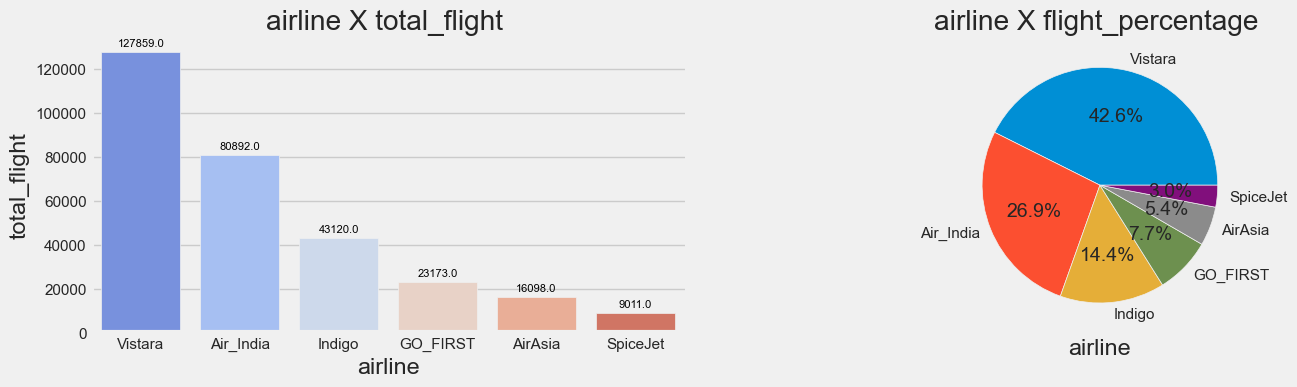

C:\Users\SWAPNIL GAIKWAD\AppData\Local\Temp\ipykernel_11584\2559749413.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= flight_data_info ,x= category,y=aggregate,palette="coolwarm")
C:\Users\SWAPNIL GAIKWAD\AppData\Local\Temp\ipykernel_11584\2559749413.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= flight_data_info ,x= category,y=aggregate,palette="coolwarm")


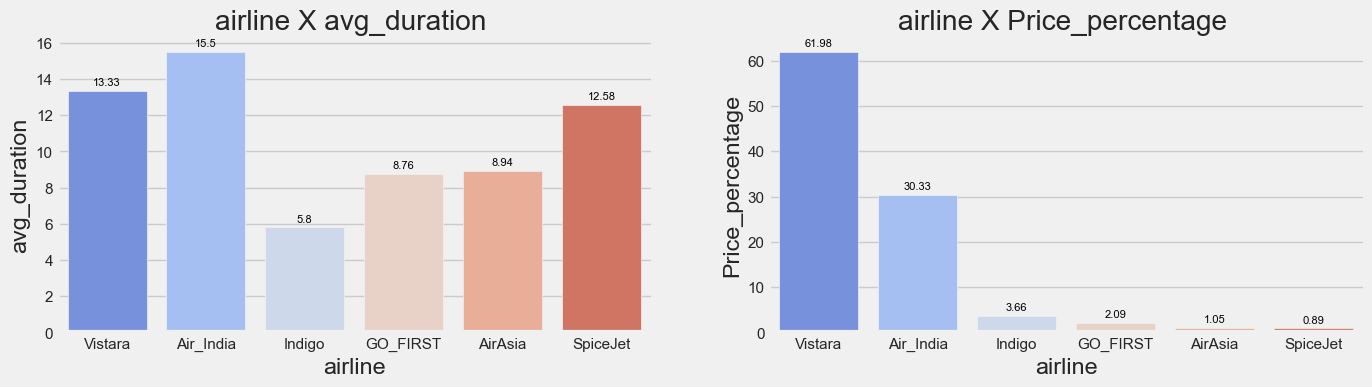

In [117]:
# 1. What are the airlines in the dataset, accompanied by thier frequencies?
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
top_airlines_with_high_flights = fligh_data_info("barplot","airline","total_flight")
top_airlines_with_high_flights

# 1. What are the airlines in the dataset, accompanied by thier flight_percentage?
plt.subplot(2,2,2)
top_airlines_with_flight = fligh_data_info("piechart","airline","flight_percentage")
top_airlines_with_high_flights

plt.figure(figsize=(15,8))
plt.subplot(2,2,3)
top_airlines_with_high_flights = fligh_data_info("barplot","airline","avg_duration")
top_airlines_with_high_flights

plt.subplot(2,2,4)
top_airlines_with_high_flights = fligh_data_info("barplot","airline","Price_percentage")
top_airlines_with_high_flights


### Departure time

C:\Users\SWAPNIL GAIKWAD\AppData\Local\Temp\ipykernel_11584\177752004.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= flight_data_info ,x= category,y=aggregate,palette="coolwarm")


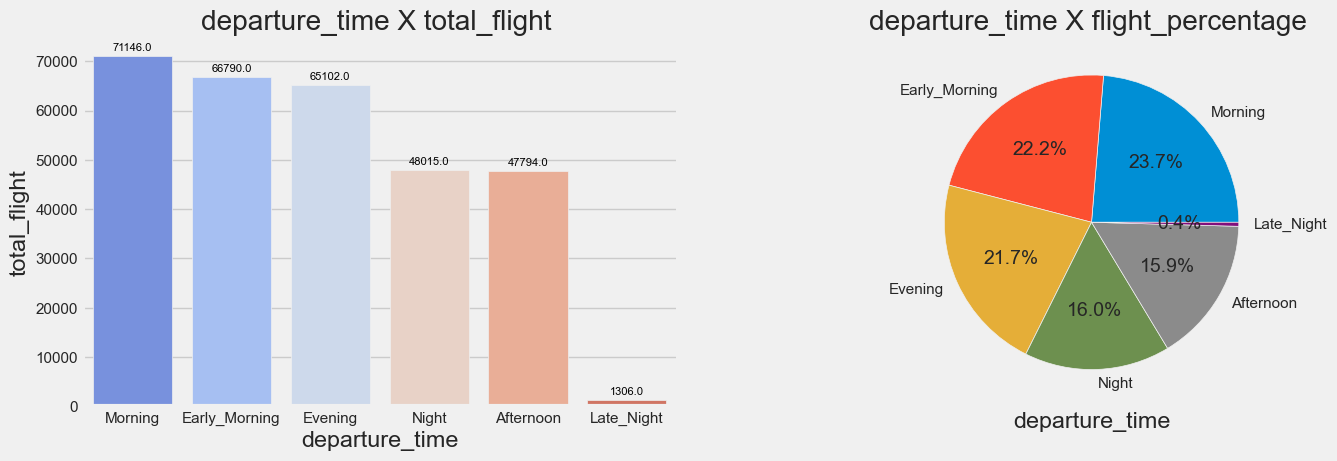

In [106]:
# 2. Departure time by thier frequencies and flight_percentage ?
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
departure_time_with_high_flights = fligh_data_info("barplot","departure_time","total_flight")
departure_time_with_high_flights

plt.subplot(2,2,2)
departure_time_flight_per = fligh_data_info("piechart","departure_time","flight_percentage")
departure_time_flight_per



### Arrival Time

C:\Users\SWAPNIL GAIKWAD\AppData\Local\Temp\ipykernel_11584\177752004.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= flight_data_info ,x= category,y=aggregate,palette="coolwarm")


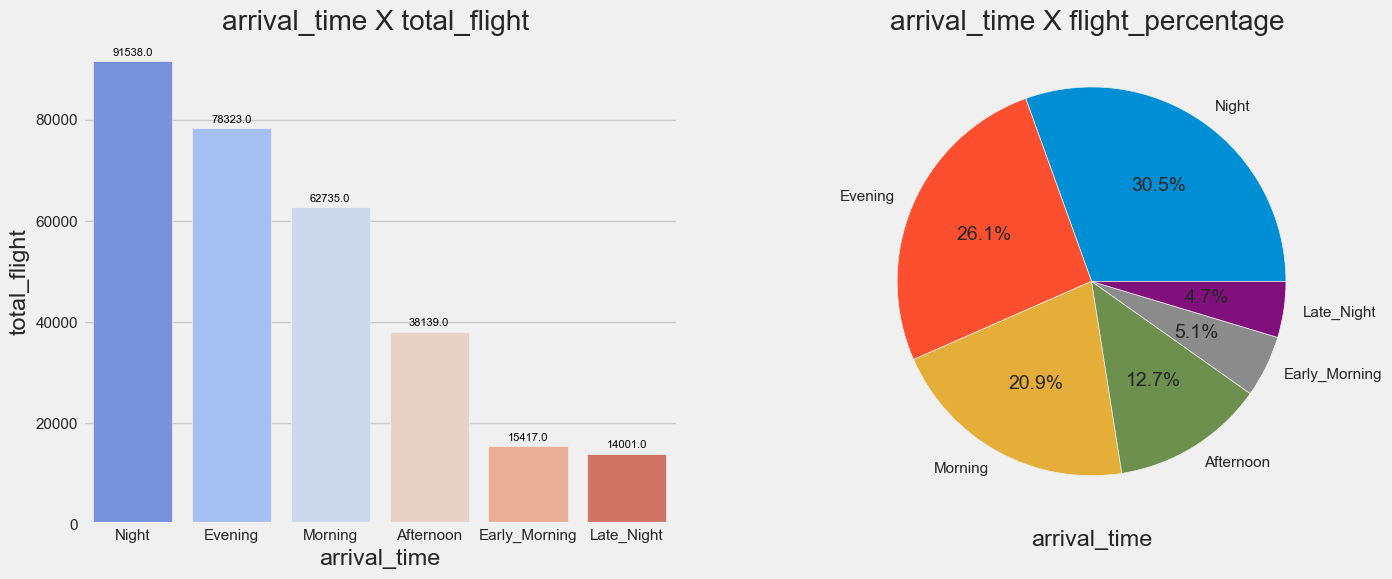

In [107]:
# 2. Arrival time by thier frequencies and flight_percentage?
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
arrival_time_with_high_flights = fligh_data_info("barplot","arrival_time","total_flight")
arrival_time_with_high_flights

plt.subplot(1,2,2)
arrival_time_flight_per = fligh_data_info("piechart","arrival_time","flight_percentage")
arrival_time_flight_per

C:\Users\SWAPNIL GAIKWAD\AppData\Local\Temp\ipykernel_11584\2559749413.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= flight_data_info ,x= category,y=aggregate,palette="coolwarm")


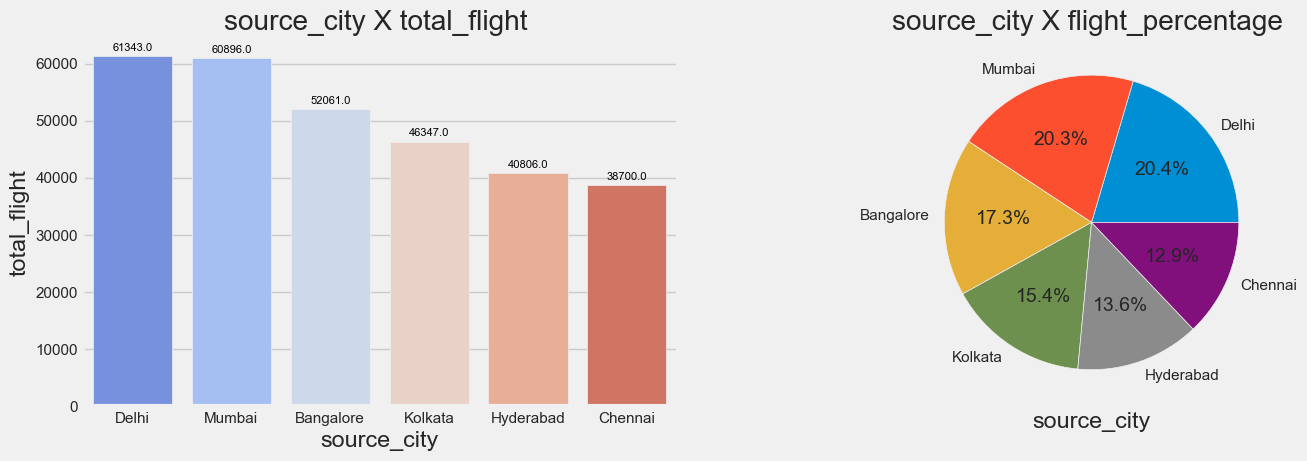

C:\Users\SWAPNIL GAIKWAD\AppData\Local\Temp\ipykernel_11584\2559749413.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= flight_data_info ,x= category,y=aggregate,palette="coolwarm")
C:\Users\SWAPNIL GAIKWAD\AppData\Local\Temp\ipykernel_11584\2559749413.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= flight_data_info ,x= category,y=aggregate,palette="coolwarm")


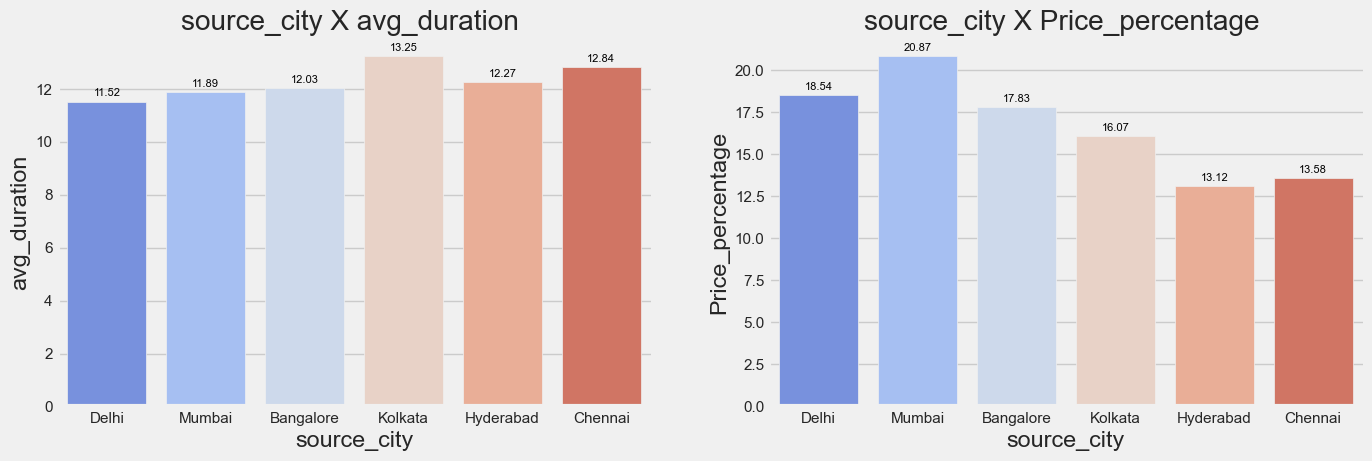

In [118]:
# 2. flight by thier frequencies and flight_percentage?
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
source_city_with_high_flights = fligh_data_info("barplot","source_city","total_flight")
source_city_with_high_flights

plt.subplot(2,2,2)
source_city_flight_per = fligh_data_info("piechart","source_city","flight_percentage")
source_city_flight_per

plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
top_airlines_with_high_flights = fligh_data_info("barplot","source_city","avg_duration")
top_airlines_with_high_flights

plt.subplot(2,2,4)
top_airlines_with_high_flights = fligh_data_info("barplot","source_city","Price_percentage")
top_airlines_with_high_flights




C:\Users\SWAPNIL GAIKWAD\AppData\Local\Temp\ipykernel_11584\177752004.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= flight_data_info ,x= category,y=aggregate,palette="coolwarm")


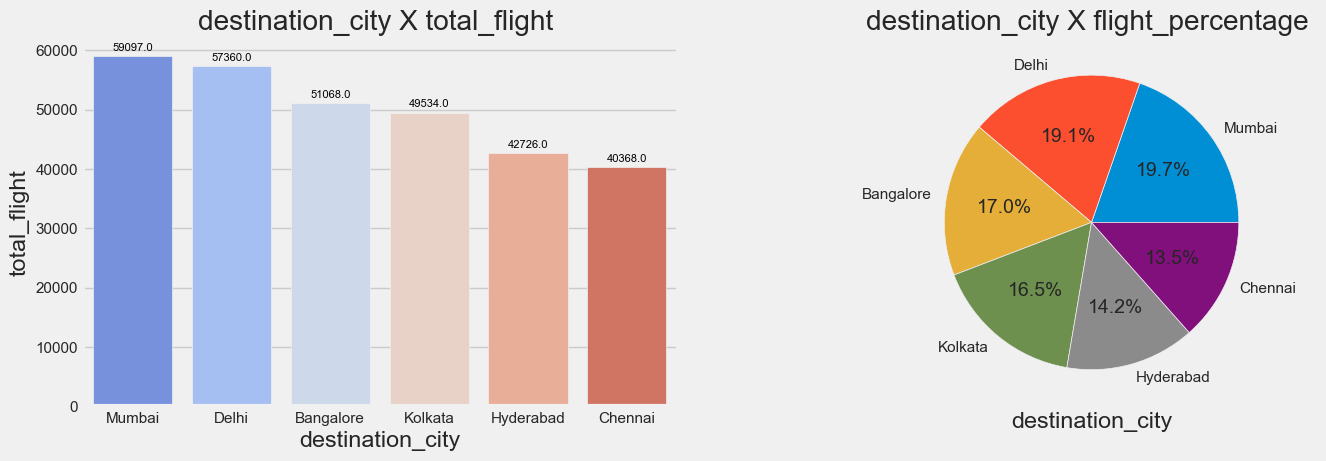

C:\Users\SWAPNIL GAIKWAD\AppData\Local\Temp\ipykernel_11584\177752004.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= flight_data_info ,x= category,y=aggregate,palette="coolwarm")


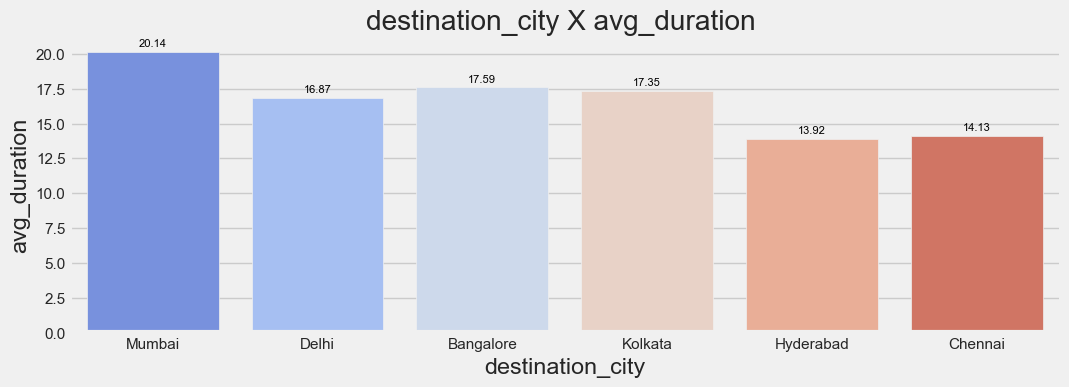

In [109]:
# 2. flight by thier frequencies and flight_percentage?
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
destination_city_with_high_flights = fligh_data_info("barplot","destination_city","total_flight")
destination_city_with_high_flights

plt.subplot(2,2,2)
destination_city_flight_per = fligh_data_info("piechart","destination_city","flight_percentage")
destination_city_flight_per

plt.figure(figsize=(25,8))
plt.subplot(2,2,3)
top_airlines_with_high_flights = fligh_data_info("barplot","destination_city","avg_duration")
top_airlines_with_high_flights

C:\Users\SWAPNIL GAIKWAD\AppData\Local\Temp\ipykernel_11584\2559749413.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= flight_data_info ,x= category,y=aggregate,palette="coolwarm")


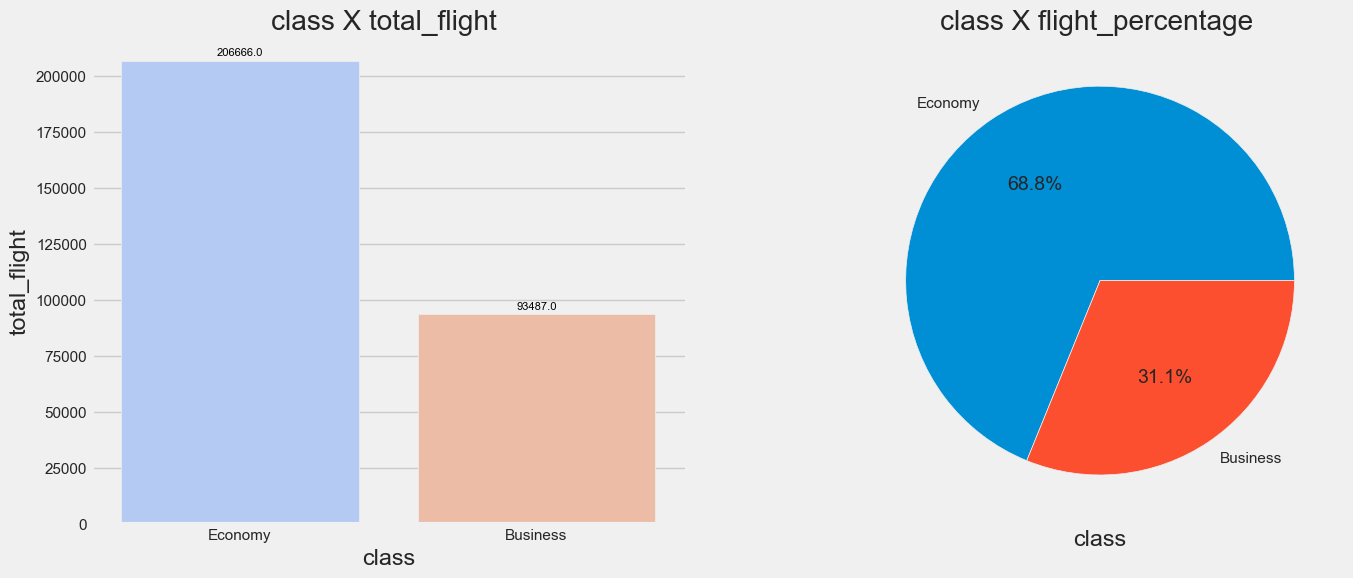

C:\Users\SWAPNIL GAIKWAD\AppData\Local\Temp\ipykernel_11584\2559749413.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= flight_data_info ,x= category,y=aggregate,palette="coolwarm")


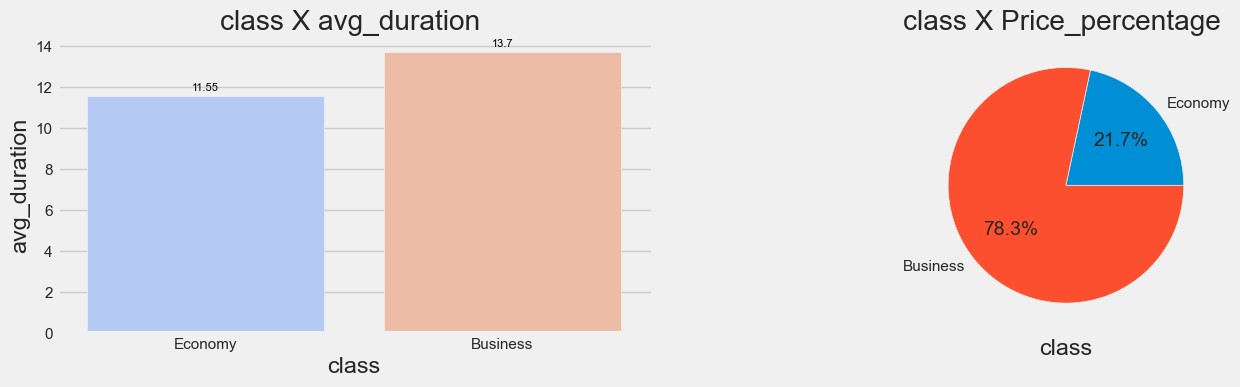

In [121]:
# 2. flight by thier frequencies and flight_percentage?
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
class_with_high_flights = fligh_data_info("barplot","class","total_flight")
class_with_high_flights

plt.subplot(1,2,2)
class_flight_per = fligh_data_info("piechart","class","flight_percentage")
class_flight_per

plt.figure(figsize=(15,8))
plt.subplot(2,2,3)
top_airlines_with_high_flights = fligh_data_info("barplot","class","avg_duration")
top_airlines_with_high_flights

plt.subplot(2,2,4)
top_airlines_with_high_flights = fligh_data_info("piechart","class","Price_percentage")
top_airlines_with_high_flights

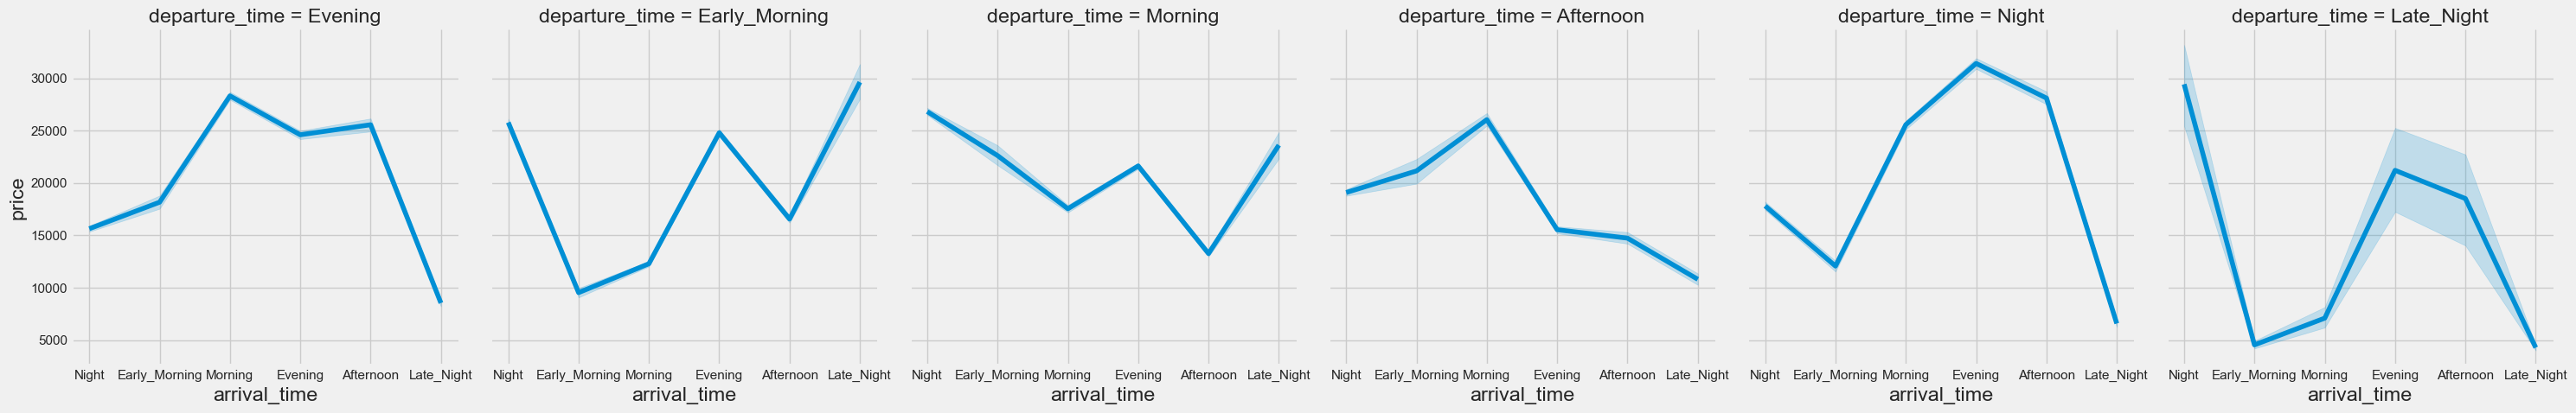

In [111]:
# 5. Does ticket price change based on the departure time and arrival time?
sns.relplot(col="departure_time", y="price", kind="line",x='arrival_time', data=flight_data)
plt.show()

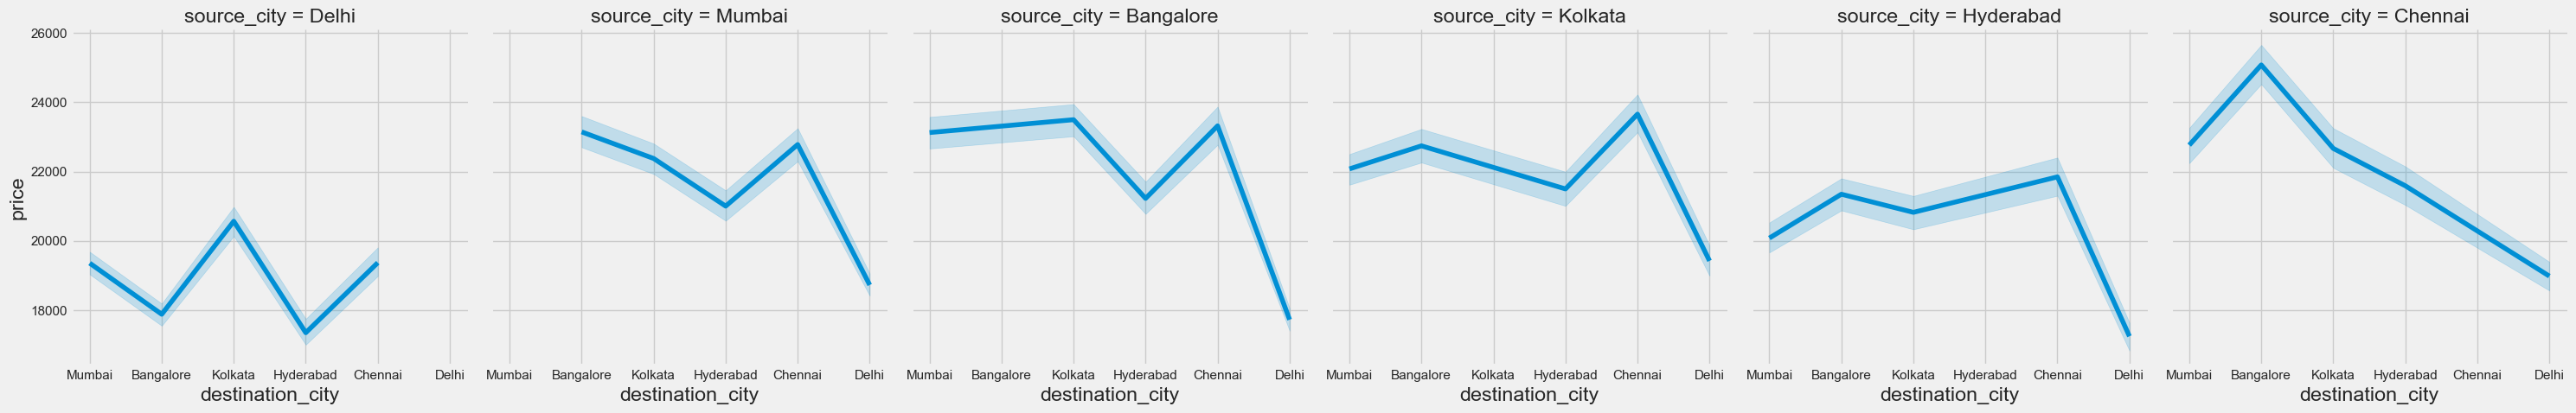

In [112]:
# 6. How the price changes with change in Source and Destination?
sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=flight_data)
plt.show()